In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pvq = pd.read_csv('ESS8MDHe02.1_F1.csv')

In [4]:
length = len(pvq)
shape = pvq.shape

print(f"Length: {length} \nShape: {shape}")

Length: 44387 
Shape: (44387, 30)


In [5]:
pd.set_option('display.max_columns', None)

pvq.head()

,ess8_id,cntry,ess8_reg,nuts1,nuts2,nuts3,lrscale,rlgdgr,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,Unnamed: 29
0,AT000000001,AT,AT13,AT1,AT13,NaN,0,0,2,6,1,2,2,3,5,1,2,4,3,1,2,6,3,6,1,1,1,6,3,NaN
1,AT000000002,AT,AT13,AT1,AT13,NaN,1,0,3,6,2,3,5,3,5,3,4,3,2,3,3,4,5,5,2,2,2,5,5,NaN
2,AT000000004,AT,AT31,AT3,AT31,NaN,5,6,3,5,2,4,1,6,5,2,3,2,2,3,6,1,6,3,3,1,2,2,3,NaN
3,AT000000006,AT,AT13,AT1,AT13,NaN,0,7,2,3,2,2,2,3,3,2,2,2,2,3,3,2,3,4,2,2,3,2,2,NaN
4,AT000000010,AT,AT22,AT2,AT22,NaN,5,10,3,4,1,4,3,3,5,3,1,1,1,1,3,4,5,2,3,1,1,4,1,NaN


In [6]:
pvq_imp_columns = pvq.copy()

# ToDo: 
- [x] remove data on religiousness attribute (i.e. rlgdgr)& other random columns
- [x] create a "mapping" list (of questions to values) from which the average will be derived. To identify mapping look at [the relevant paper](https://www.europeansocialsurvey.org/docs/methodology/core_ess_questionnaire/ESS_core_questionnaire_human_values.pdf) on page 284
- [x] plot a distribution of the political-preference attribute (lrscale) to identify any biases in the data (or just skewed data)
    - I could then split it into different data sets etc...
- [ ] return whatever yields higher accuracy and lower error

### Removing irrelevant columns & false responses

In [7]:
pvq_imp_columns.drop(['ess8_id', 'cntry', 'ess8_reg','nuts1', 'nuts2','nuts3', 'rlgdgr','Unnamed: 29'], inplace=True, axis=1)



In [8]:
pvq_imp_columns.shape

(44387, 22)

Counting the false responses for each of the relevant columns

In [9]:
for column in pvq_imp_columns:
    if column == "lrscale":
        pvq_over_10 = pvq.loc[pvq[column] > 10]
        print(f"{column}: {pvq_over_10.shape}")
    else:
        pvq_over_6 = pvq.loc[pvq[column] > 6]
        print(f"{column}: {pvq_over_6.shape}")

lrscale: (5804, 30)
ipcrtiv: (847, 30)
imprich: (793, 30)
ipeqopt: (820, 30)
ipshabt: (896, 30)
impsafe: (746, 30)
impdiff: (825, 30)
ipfrule: (1021, 30)
ipudrst: (882, 30)
ipmodst: (858, 30)
ipgdtim: (816, 30)
impfree: (796, 30)
iphlppl: (801, 30)
ipsuces: (928, 30)
ipstrgv: (1002, 30)
ipadvnt: (839, 30)
ipbhprp: (876, 30)
iprspot: (1002, 30)
iplylfr: (777, 30)
impenv: (759, 30)
imptrad: (754, 30)
impfun: (824, 30)


In [10]:
lrscale = pvq_imp_columns["lrscale"]
lrscale_cleaned = lrscale.copy()

In [11]:
lrscale_cleaned = lrscale_cleaned.to_frame(name="lrscale")

lrscale_cleaned = lrscale_cleaned[lrscale_cleaned.lrscale <= 10]

In [12]:
lrscale_cleaned.shape

(38583, 1)

## Normal Distribution on lrscale

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa33fbb0a10>]],
      dtype=object)

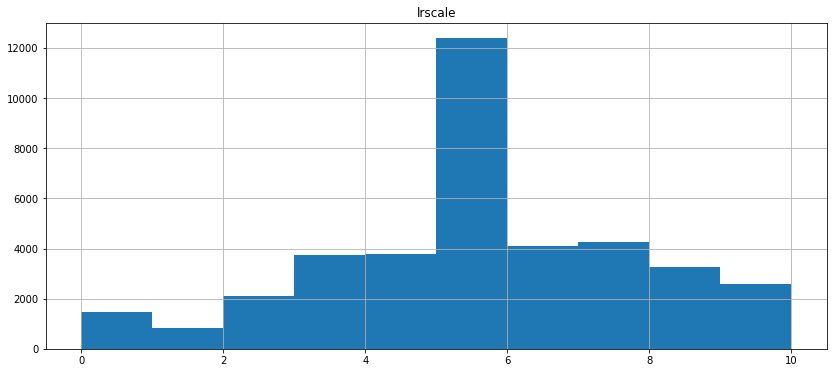

In [13]:
# ax = sns.distplot(lrscale_cleaned)
# plt.show()
lrscale_cleaned.hist(bins=10, figsize=[14,6])

## Cleaning the data

removing all invalid rows (i.e. with lrscale values over 10 and the rest over 6)

In [14]:
pvq_cleaned = pvq_imp_columns.copy()

indexNums = pvq_cleaned[(pvq_cleaned['lrscale'] > 10) | (pvq_cleaned['ipeqopt'] > 6) | (pvq_cleaned['ipudrst'] > 6) 
                        | (pvq_cleaned['impenv'] > 6) | (pvq_cleaned['ipshabt'] > 6) | (pvq_cleaned['ipsuces'] > 6)
                        | (pvq_cleaned['iphlppl'] > 6)| (pvq_cleaned['iplylfr'] > 6) | (pvq_cleaned['ipcrtiv'] > 6)
                        | (pvq_cleaned['impfree'] > 6) | (pvq_cleaned['impdiff'] > 6) | (pvq_cleaned['ipadvnt'] > 6)
                        | (pvq_cleaned['ipgdtim'] > 6) | (pvq_cleaned['impfun'] > 6) |(pvq_cleaned['imprich'] > 6)
                        | (pvq_cleaned['iprspot'] > 6) | (pvq_cleaned['impsafe'] > 6) | (pvq_cleaned['ipstrgv'] > 6) 
                        | (pvq_cleaned['ipfrule'] > 6) | (pvq_cleaned['ipbhprp'] > 6) | (pvq_cleaned['ipmodst'] > 6)
                        | (pvq_cleaned['imptrad'] > 6)].index


pvq_cleaned.drop(indexNums, inplace=True, axis=0)
# pvq_cleaned.shape


## Mapping (questions to values)

Approach: Create a human value dictionary: For each value, create a list of questions (strings) corresponding to that value

In [15]:
values = {'universalism':[],'achievement':[],'benevolence':[],'self_direction':[],'stimulation':[],'hedonism':[],'power':[],
         'security':[], 'conformity':[], 'tradition':[]}

universalism = ['ipeqopt','ipudrst','impenv']
# values.append(universalism)
values["universalism"] = universalism

achievement = ['ipshabt','ipsuces']
# values.append(achievement)
values["achievement"] = achievement

benevolence = ['iphlppl', 'iplylfr']
# values.append(benevolence)
values["benevolence"] = benevolence

self_direction = ['ipcrtiv', 'impfree']
# values.append(self_direction)
values['self_direction'] = self_direction

stimulation = ['impdiff', 'ipadvnt']
# values.append(stimulation)
values['stimulation'] = stimulation

hedonism = ['ipgdtim', 'impfun']
# values.append(hedonism)
values['hedonism'] = hedonism

power = ['imprich', 'iprspot']
# values.append(power)
values['power'] = power

security = ['impsafe', 'ipstrgv']
# values.append(security)
values['security'] = security

conformity = ['ipfrule', 'ipbhprp']
# values.append(conformity)
values['conformity'] = conformity

tradition = ['ipmodst','imptrad']
# values.append(tradition)
values['tradition'] = tradition


In [16]:
pvq_cleaned.to_csv(r'pvq21cleaned.csv', index= False)

## Potential solution: 

### The data structure

{index0: {value1: NUM, value2: NUM, ..., value10: NUM}, index1}

where `index` is the person responding which containts a dictioanary of values and the corresponding scores

*Create a dictionary*
averaged_raw = {}

for index,rows in pvq_cleaned.iterrows():
    *for each cell in each row*
    for el in rows: 
        for value in values:
            for question in value:
                #add the score of that question to the corresponding value score
                {index0: {value1: NUM, value2: NUM, ..., value10: NUM}, index1}

            
        

In [17]:
from collections import defaultdict

In [35]:
averaged_raw = defaultdict(lambda: defaultdict(lambda: 0))
# averaged_raw_test = {}
overall_score = 0

for index,rows in pvq_cleaned.iterrows():
    averaged_raw[index]['lrscale'] = rows['lrscale'] #adding the left-right scale
    overall_score = 0
    person_overall_score = 0 #instantiating the variable that will sum of value scores for each person
    for human_value,questions in values.items():
        cumulative_value = 0 #instantiate the variable that will hold all question scores mapping to a value
        value_score = 0  #instantiate the variable that will hold the score for the mapped value
        for question in questions:
            cumulative_value += rows[question]
            num_questions = len(questions)
        
        value_score = cumulative_value/num_questions
        averaged_raw[index][human_value] =  value_score

        person_overall_score += value_score #calculate the overall, global score

        
    averaged_raw[index]['p_avg'] = person_overall_score/10


Make sure the numbers are being added cumulatively

In [39]:
# print(averaged_raw)
# print(averaged_raw_test)
# print(len(averaged_raw))
print(averaged_raw[3]['p_avg'])

2.4333333333333336


# ToDo

- [x] Find a way to store the lrscale measurement (e.g. just add it in the dictionary of each individual or consider adding instead of index)
- [ ] Implement scoring for each person
- [ ] Convert back to csv?




### Scoring

In [40]:
#make it faster!

def centred_scoring(p_avg, raw_score,overall_avg):
    POSITIVITY_CONSTANT = 3.5
    centred_score = (raw_score - p_avg + POSITIVITY_CONSTANT)
    
    return centred_score


def create_centred_dict(value_score_dictionary):
    centred_scores = defaultdict(lambda: defaultdict(lambda: 0))
    for index,scores in value_score_dictionary.items():
        centred_scores[index]['lrscale'] = scores['lrscale']
        for value, raw_score in scores.items():
            if value != 'lrscale':
                centred_scores[index][value] = centred_scoring(value_score_dictionary[index]['p_avg'],raw_score,index)


    return centred_scores
    
        
centred_dict = create_centred_dict(averaged_raw)

In [41]:
pvq_centred_scores = pd.DataFrame.from_dict(centred_dict, orient='index')

In [42]:
pvq_centred_scores.to_csv('pvq21CENTRED.csv', index = True)

In [43]:
pvq_centred_scores 

,lrscale,universalism,achievement,benevolence,self_direction,stimulation,hedonism,power,security,conformity,tradition,p_avg
0,0,1.50,2.500000,1.500000,3.000000,3.500000,4.000000,4.000000,4.500000,6.000000,4.500000,3.5
1,1,2.20,2.866667,2.366667,2.366667,3.866667,3.866667,3.866667,4.366667,4.866667,4.366667,3.5
2,5,2.35,5.350000,2.350000,2.850000,6.350000,2.850000,4.350000,1.350000,4.350000,2.850000,3.5
3,0,3.40,3.566667,3.566667,3.066667,4.066667,3.066667,3.566667,3.066667,4.566667,3.066667,3.5
4,5,2.55,4.383333,1.883333,2.883333,4.883333,1.883333,4.383333,4.383333,4.383333,3.383333,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
44382,1,4.85,3.350000,2.850000,2.850000,2.850000,2.850000,3.850000,2.850000,5.350000,3.350000,3.5
44383,5,3.25,3.083333,2.583333,2.583333,5.083333,4.083333,4.583333,3.083333,3.083333,3.583333,3.5
44384,0,2.70,2.866667,3.366667,2.866667,4.366667,5.866667,4.866667,2.866667,2.366667,2.866667,3.5
44385,4,3.50,3.000000,3.500000,3.000000,3.000000,2.500000,3.500000,3.000000,5.500000,4.500000,3.5
